In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv("report-v6.csv", low_memory=False)
df['StartTime'] = pd.to_datetime(df['StartTime'])
df.head()

,ID,StartTime,Duration_ns,ConnDuration_ns,DialDuration_ns,DNSDuration_ns,RequestDuration_ns,Status,StatusCode,Error
0,kong,2024-02-16 13:33:17+01:00,13533125,5256459,385166,2778667,847708,200 OK,200,NaN
1,kong,2024-02-16 13:33:17+01:00,43142750,5344792,561458,2754708,708292,200 OK,200,NaN
2,kong,2024-02-16 13:33:17+01:00,49054166,5271708,483375,2773000,741875,200 OK,200,NaN
3,kong,2024-02-16 13:33:17+01:00,63930125,5456916,710459,2657625,595250,200 OK,200,NaN
4,apisix,2024-02-16 13:33:17+01:00,64540166,773167,292375,434834,32667,200 OK,200,NaN


In [93]:
# df = df[df['Error'].isna()].copy()
# df = df[(df['StartTime'] > '2024-02-15 15:09:30') & (df['StartTime'] < '2024-02-15 15:10:30')].copy()

In [94]:
for col in df.columns:
    if col.endswith('_ns'):
        ms_col = col.replace('_ns','_ms')
        df[ms_col] = df[col]/1000000
df['netto_ms'] = df['Duration_ms'] - df['ConnDuration_ms']

In [95]:
aggs = {
    col: ['count','mean','std'] for col in df.columns if col.endswith('_ms')
}
df.groupby(['ID','StatusCode']).agg(aggs)

Duration_ms                       ConnDuration_ms  \
                            count       mean        std           count   
ID         StatusCode                                                     
apisix     200              28296  11.084279  39.213940           28296   
go-httpbin 200              28296   2.225402  17.626437           28296   
kong       200              28296   3.635411  23.886581           28296   

                                           DialDuration_ms            \
                           mean        std           count      mean   
ID         StatusCode                                                  
apisix     200         0.710024   6.979866           28296  0.264395   
go-httpbin 200         0.891116  12.824035           28296  0.381629   
kong       200         0.815547  12.322644           28296  0.337772   

                                DNSDuration_ms                      \
                            std          count      mean       std   
ID         StatusCode                                                
apisix     200         4.449374          28296  0.198816  0.193156   
go-httpbin 200         9.139081          28296  0.202746  0.306457   
kong       200         9.023757          28296  0.197255  0.237753   

                      RequestDuration_ms                     netto_ms  \
                                   count      mean       std    count   
ID         StatusCode                                                   
apisix     200                     28296  0.027636  0.032174    28296   
go-httpbin 200                     28296  0.029170  0.036462    28296   
kong       200                     28296  0.027854  0.035003    28296   

                                             
                            mean        std  
ID         StatusCode                        
apisix     200         10.374255  38.583389  
go-httpbin 200          1.334286  12.023787  
kong       200          2.819864  20.382259

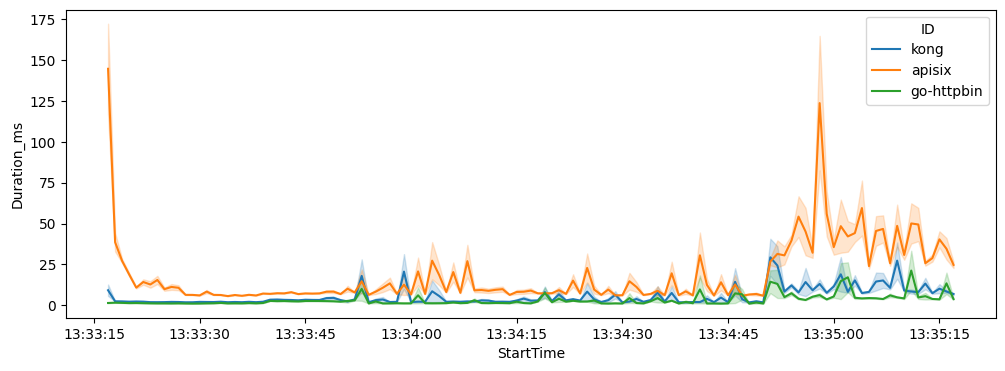

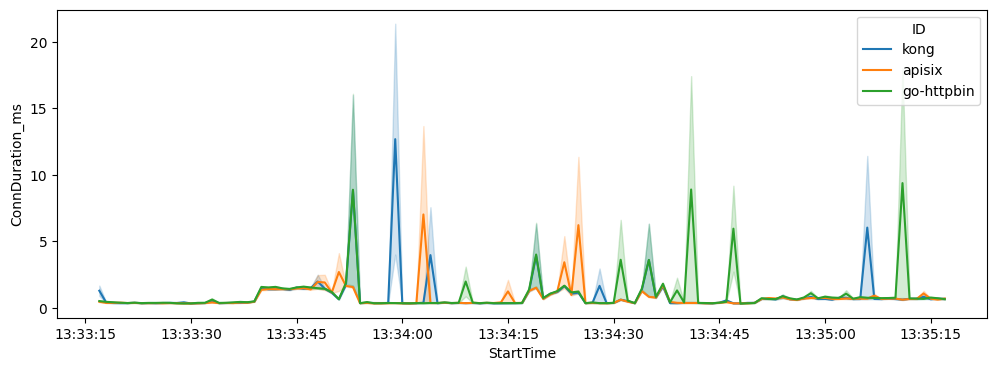

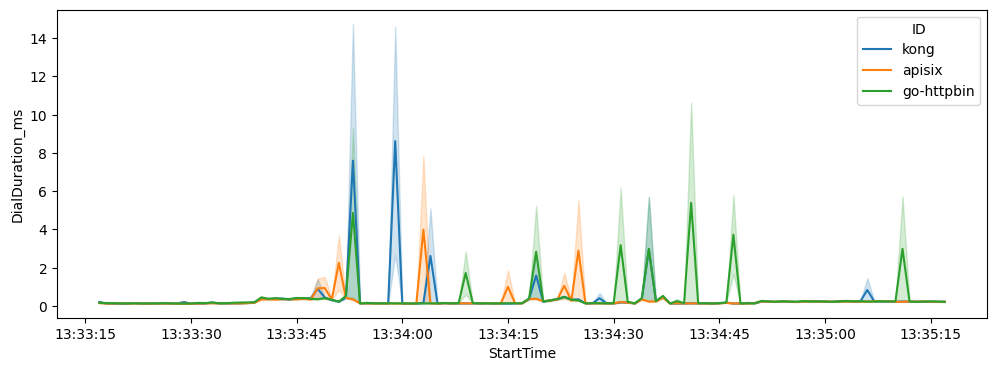

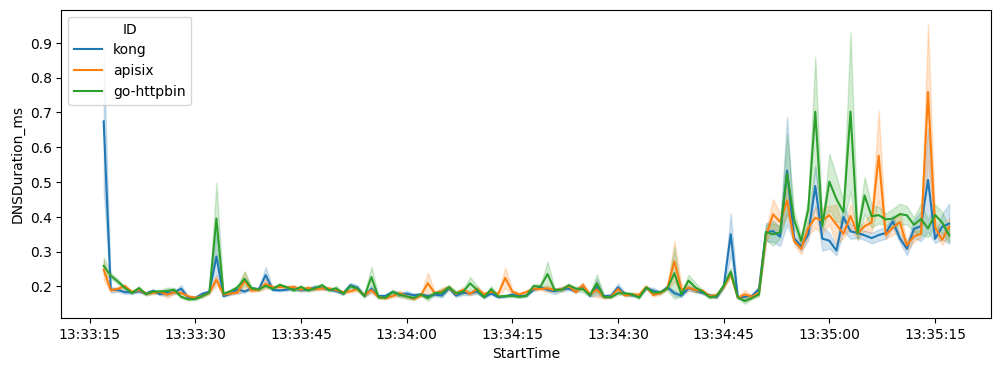

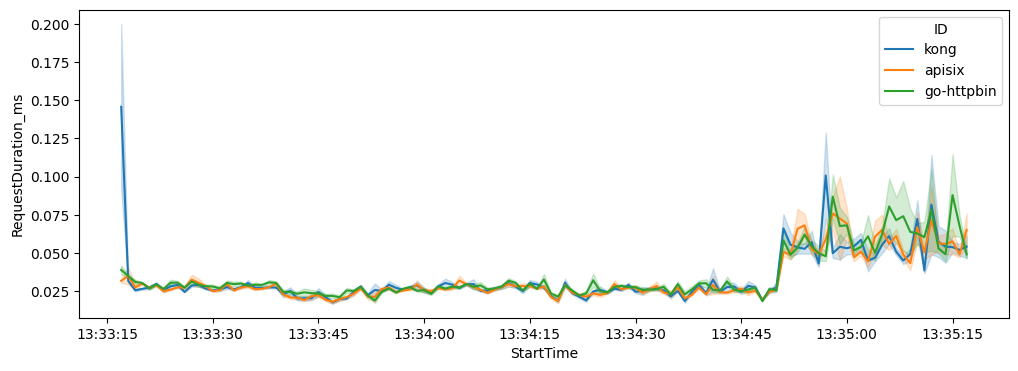

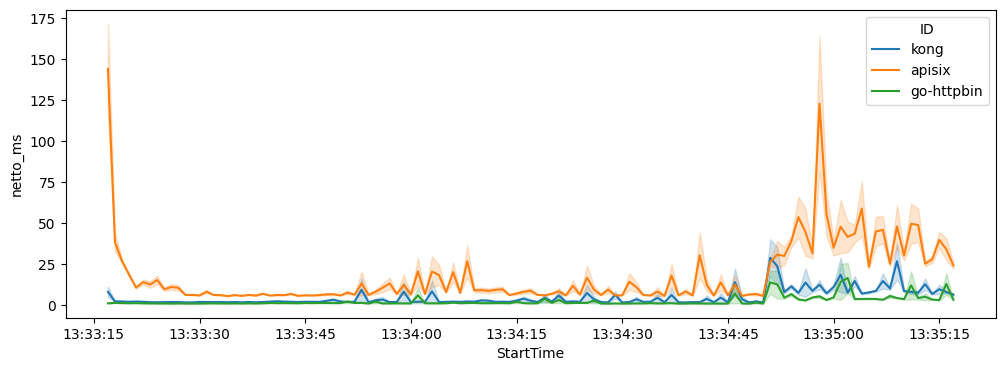

In [96]:
for col in df.columns:
    if col.endswith('_ms'):
        plt.figure(figsize=(12,4))
        sns.lineplot(data=df,x='StartTime',y=col,hue="ID",errorbar='se')
        plt.show()

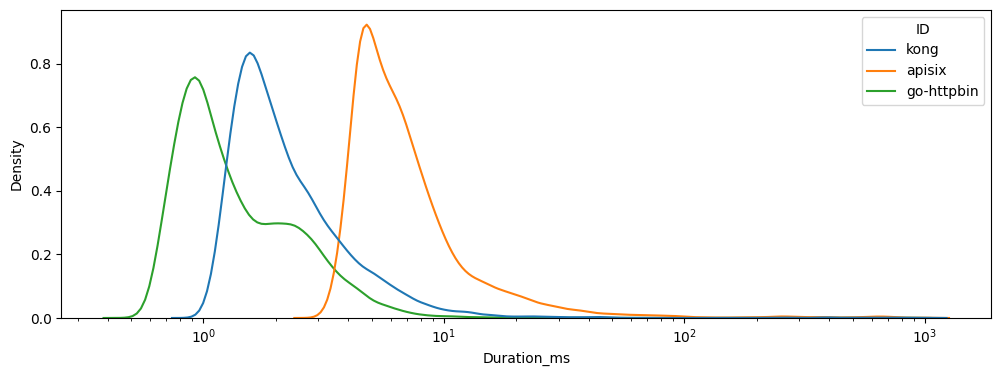

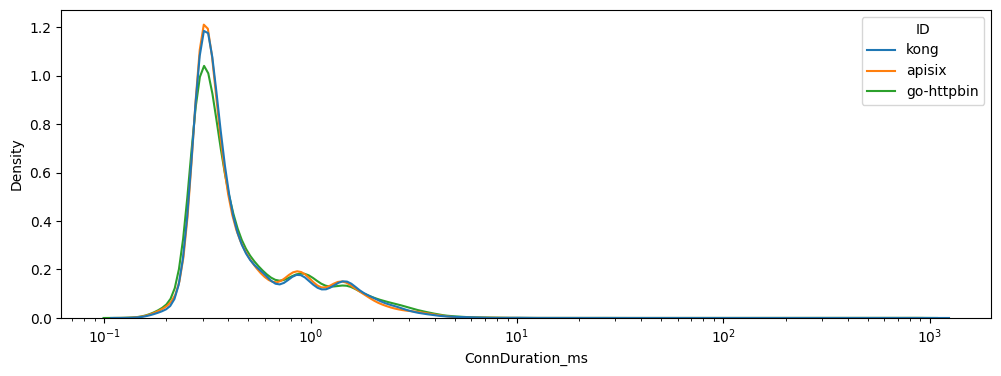

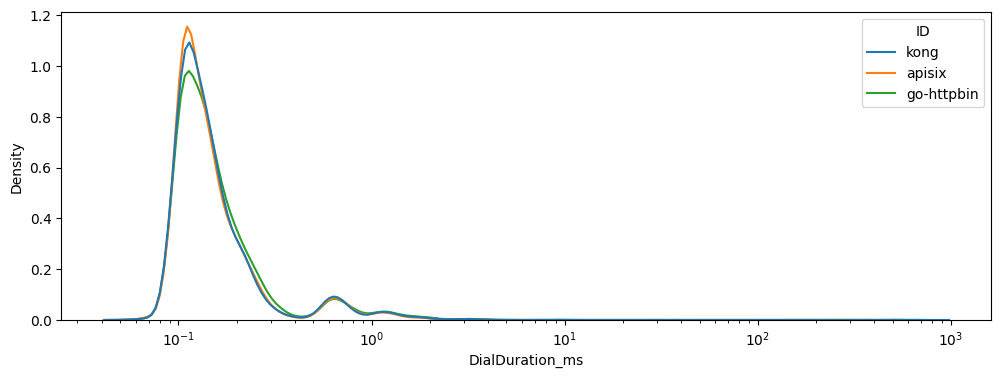

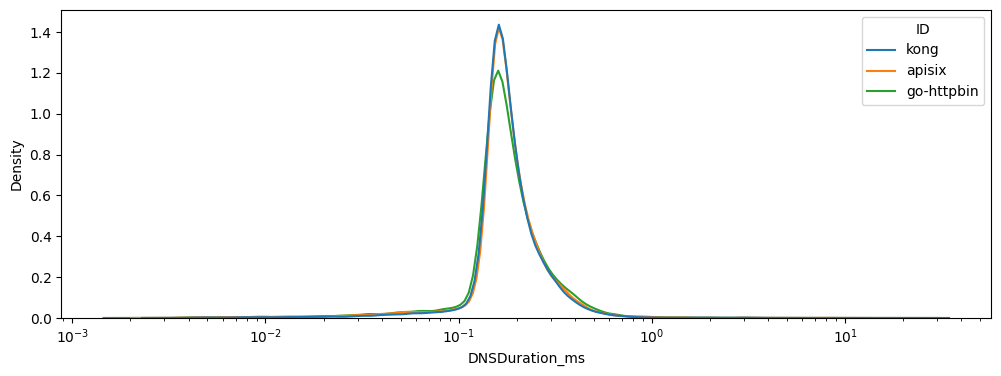

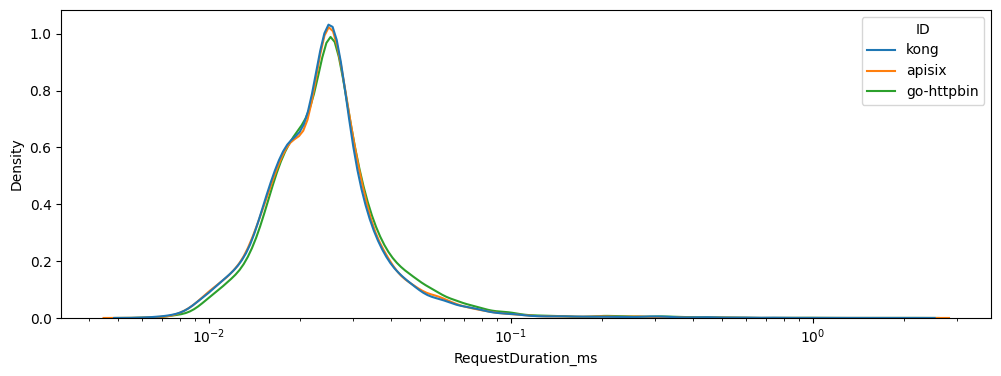

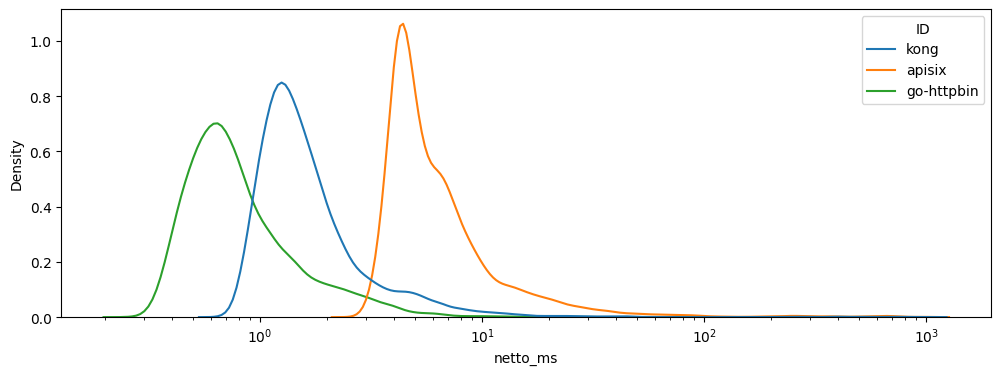

In [97]:
for col in df.columns:
    if col.endswith('_ms'):
        plt.figure(figsize=(12,4))
        sns.kdeplot(data=df,x=col,hue="ID", log_scale=(True,False))
        plt.show()

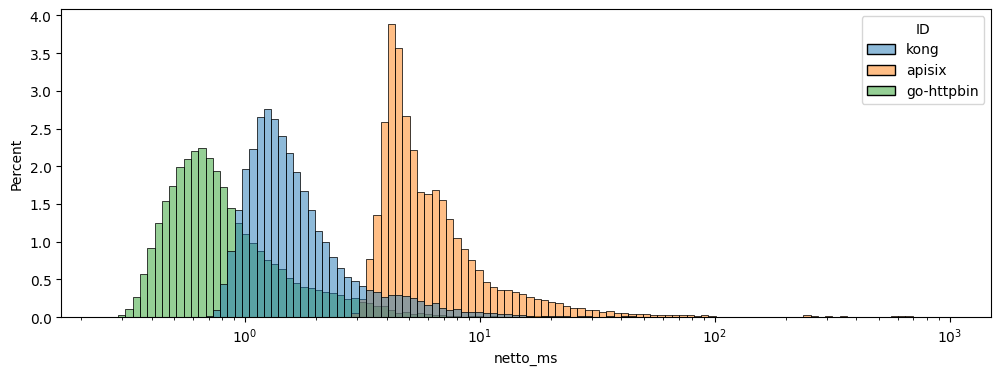

In [98]:
plt.figure(figsize=(12,4))
sns.histplot(data=df,x=col,hue="ID", log_scale=(True,False), stat='percent')
plt.show()